## Create Image Paths and Labels DF

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/MyDrive/Chest X-Ray ML/Data_Entry_2017.csv'

path_and_labels = pd.read_csv(file_path)


In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
unique_labels = path_and_labels['Finding Labels'].unique()
unique_labels

In [ ]:
for index, row in path_and_labels.iterrows():
    labels = row['Finding Labels']
    # Check if 'Emphysema' is in the labels
    if 'Effusion' in labels:
        # If 'Emphysema' is present, set the labels to 'Emphysema'
        path_and_labels.at[index, 'Finding Labels'] = 'Effusion'
    else:
        # If 'Emphysema' is not present, set the labels to 'Not Emphysema'
        path_and_labels.at[index, 'Finding Labels'] = 'Not Effusion'

# Display the modified DataFrame
path_and_labels['Finding Labels']

0         Not Effusion
1         Not Effusion
2             Effusion
3         Not Effusion
4         Not Effusion
              ...     
112115    Not Effusion
112116    Not Effusion
112117    Not Effusion
112118    Not Effusion
112119    Not Effusion
Name: Finding Labels, Length: 112120, dtype: object

In [ ]:
label_counts = path_and_labels['Finding Labels'].value_counts()
label_counts

Finding Labels
Not Effusion    98803
Effusion        13317
Name: count, dtype: int64

In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
# /content/drive/MyDrive/archive/images_001/images/

In [ ]:
prefixes = {
    0: '/content/drive/MyDrive/archive/images_001/images/',
    4999: '/content/drive/MyDrive/archive/images_002/images/',
    14999: '/content/drive/MyDrive/archive/images_003/images/',
    24999: '/content/drive/MyDrive/archive/images_004/images/',
    34999: '/content/drive/MyDrive/archive/images_005/images/',
    44999: '/content/drive/MyDrive/archive/images_006/images/',
    54999: '/content/drive/MyDrive/archive/images_007/images/',
    64999: '/content/drive/MyDrive/archive/images_008/images/',
    74999: '/content/drive/MyDrive/archive/images_009/images/',
    84999: '/content/drive/MyDrive/archive/images_010/images/',
    94999: '/content/drive/MyDrive/archive/images_011/images/',
    104999: '/content/drive/MyDrive/archive/images_012/images/'
}

# Update the 'Image Index' column based on the row index
for index, row in path_and_labels.iterrows():
    for start_index, prefix in prefixes.items():
        next_index = list(prefixes.keys())[list(prefixes.keys()).index(start_index) + 1] if list(prefixes.keys()).index(start_index) + 1 < len(prefixes) else len(path_and_labels)
        if index < next_index:
            path_and_labels.at[index, 'Image Index'] = prefix + row['Image Index']
            break


# Display the first few rows of the updated DataFrame to verify the changes
print(path_and_labels['Image Index'].head())

0    /content/drive/MyDrive/archive/images_001/imag...
1    /content/drive/MyDrive/archive/images_001/imag...
2    /content/drive/MyDrive/archive/images_001/imag...
3    /content/drive/MyDrive/archive/images_001/imag...
4    /content/drive/MyDrive/archive/images_001/imag...
Name: Image Index, dtype: object


In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
# /content/drive/MyDrive/archive

In [ ]:
output_file_path = '/content/drive/MyDrive/archive/reupdated_path_and_labels.csv'

# Save the updated DataFrame to a CSV file
path_and_labels.to_csv(output_file_path, index=False)

In [ ]:
from PIL import Image

# Specify the path to the image
image_path = '/content/drive/MyDrive/archive/images_010/images/00024715_000.png'

# Load the image using PIL
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# Print the dimensions
print("Image dimensions (width x height):", width, "x", height)

# Get the mode of the image
mode = image.mode

# Print the mode
print("Image mode:", mode)

# L means grayscale

Image dimensions (width x height): 1024 x 1024
Image mode: L


In [ ]:
image.show()

## Create dataset subset

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/MyDrive/archive/reupdated_path_and_labels.csv'

path_and_labels = pd.read_csv(file_path)

In [ ]:
path_and_labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,/content/drive/MyDrive/archive/images_012/imag...,Not Effusion,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [ ]:
not_effusion_df = path_and_labels[path_and_labels['Finding Labels'] == 'Not Effusion'].head(1000)

# Filter rows where 'Finding Labels' is 'Effusion'
effusion_df = path_and_labels[path_and_labels['Finding Labels'] == 'Effusion'].head(1000)

# Concatenate the two DataFrames
path_label_2000 = pd.concat([not_effusion_df, effusion_df])

# Reset index
path_label_2000.reset_index(drop=True, inplace=True)

# Print the first few rows of the new DataFrame
print(path_label_2000)

                                            Image Index Finding Labels  \
0     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
1     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
2     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
3     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
4     /content/drive/MyDrive/archive/images_001/imag...   Not Effusion   
...                                                 ...            ...   
1995  /content/drive/MyDrive/archive/images_002/imag...       Effusion   
1996  /content/drive/MyDrive/archive/images_002/imag...       Effusion   
1997  /content/drive/MyDrive/archive/images_002/imag...       Effusion   
1998  /content/drive/MyDrive/archive/images_002/imag...       Effusion   
1999  /content/drive/MyDrive/archive/images_002/imag...       Effusion   

      Follow-up #  Patient ID  Patient Age Patient Gender View Position  \
0               0           1       

In [ ]:
path_label_2000

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
3,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
4,/content/drive/MyDrive/archive/images_001/imag...,Not Effusion,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,/content/drive/MyDrive/archive/images_002/imag...,Effusion,14,2843,56,F,PA,2500,2048,0.171,0.171,NaN
1996,/content/drive/MyDrive/archive/images_002/imag...,Effusion,17,2843,56,F,PA,2500,2048,0.171,0.171,NaN
1997,/content/drive/MyDrive/archive/images_002/imag...,Effusion,18,2843,58,F,PA,2500,2048,0.168,0.168,NaN
1998,/content/drive/MyDrive/archive/images_002/imag...,Effusion,13,2846,34,M,PA,2892,2967,0.143,0.143,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder


labels = path_label_2000['Finding Labels'].values

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_labels = label_encoder.fit_transform(labels)

# Print the mapping between original labels and encoded values
label_mapping = {label: encoded_label for label, encoded_label in zip(labels, encoded_labels)}
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
Not Effusion: 1
Effusion: 0


In [ ]:
len(encoded_labels)

2000

In [ ]:
import cv2
import numpy as np
from multiprocessing import Pool

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    return img

def process_batch(batch_paths):
    batch_images = [load_image(image_path) for image_path in batch_paths]
    return batch_images

def load_images_from_df(df, num_processes=4, batch_size=32):
    image_paths = df['Image Index'].values
    images = []

    with Pool(processes=num_processes) as pool:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i+batch_size]
            batch_results = pool.map(process_batch, [batch_paths])
            for result in batch_results:
                images.extend(result)

    return np.array(images)

# Load images from the DataFrame 'path_and_labels'
images = load_images_from_df(path_label_2000)

# Print the shape of training_images
print(images.shape)

(2000, 224, 224, 3)


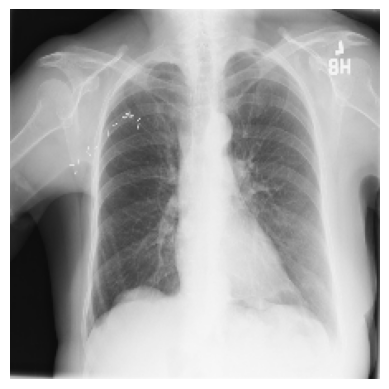

In [ ]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[4])
plt.axis('off')  # Hide axis
plt.show()

## Define a Model to Train

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
initial_learning_rate = 0.00025  # Change this value as needed


## Transfer Models

## DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Prepare the Data Generators
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Step 4: Load Pretrained DenseNet121 Model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 5: Feature Extraction
train_features = base_model.predict(train_generator)
val_features = base_model.predict(val_generator)

# Step 7: Define Custom Classification Layers
model = Sequential([
    GlobalAveragePooling2D(input_shape=train_features.shape[1:]),  # Pooling layer
    Dense(256, activation='relu'),  # Custom Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 8: Compile and Train the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_features, y_train, epochs=10, validation_data=(val_features, y_val))

13/13 [==============================] - 60s 5s/step
Epoch 1/10
50/50 [==============================] - 1s 18ms/step - loss: 0.8056 - accuracy: 0.4850 - val_loss: 0.7239 - val_accuracy: 0.4925
Epoch 2/10
50/50 [==============================] - 1s 12ms/step - loss: 0.6978 - accuracy: 0.5300 - val_loss: 0.7112 - val_accuracy: 0.4850
Epoch 3/10
50/50 [==============================] - 1s 15ms/step - loss: 0.6846 - accuracy: 0.5562 - val_loss: 0.7179 - val_accuracy: 0.4725
Epoch 4/10
50/50 [==============================] - 1s 15ms/step - loss: 0.6894 - accuracy: 0.5481 - val_loss: 0.7988 - val_accuracy: 0.4825
Epoch 5/10
50/50 [==============================] - 1s 13ms/step - loss: 0.7004 - accuracy: 0.5575 - val_loss: 0.7743 - val_accuracy: 0.5050
Epoch 6/10
50/50 [==============================] - 1s 15ms/step - loss: 0.6985 - accuracy: 0.5544 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 1s 15ms/step - loss: 0.6523 - accuracy: 0.6144 - 

In [ ]:
train_features.shape
val_features.shape

(400, 7, 7, 1024)

In [ ]:
model = Sequential([
    GlobalAveragePooling2D(input_shape=train_features.shape[1:]),  # Pooling layer
    Dense(64, activation='relu'),  # Custom Dense layer
    Dense(64, activation='relu'),   # Additional Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Define your desired learning rate
learning_rate = 0.00025

# Create an Adam optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_features, y_train, epochs=10, validation_data=(val_features, y_val))

Epoch 1/10
50/50 [==============================] - 1s 13ms/step - loss: 0.7096 - accuracy: 0.5056 - val_loss: 0.6934 - val_accuracy: 0.5400
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5319 - val_loss: 0.6943 - val_accuracy: 0.4950
Epoch 3/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6835 - accuracy: 0.5638 - val_loss: 0.6929 - val_accuracy: 0.5300
Epoch 4/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6799 - accuracy: 0.5644 - val_loss: 0.7001 - val_accuracy: 0.5075
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.6729 - accuracy: 0.5888 - val_loss: 0.6992 - val_accuracy: 0.4975
Epoch 6/10
50/50 [==============================] - 0s 8ms/step - loss: 0.6676 - accuracy: 0.5981 - val_loss: 0.6984 - val_accuracy: 0.5200
Epoch 7/10
50/50 [==============================] - 0s 9ms/step - loss: 0.6566 - accuracy: 0.6131 - val_loss: 0.7068 - val_accuracy: 0.5075
Epoch 8/10
50/50 [=

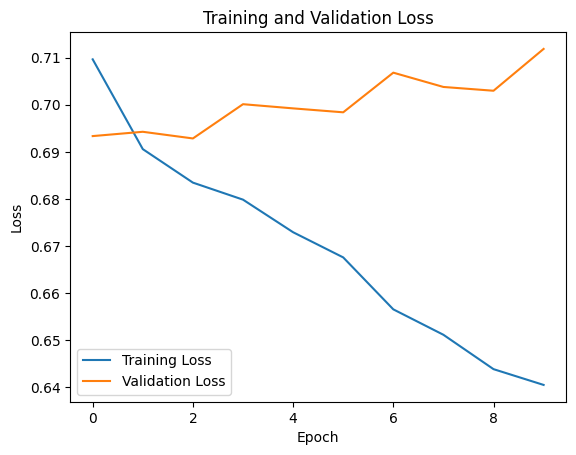

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(val_features)  # Use the extracted features for prediction

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 0s 10ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.51      0.58      0.54       201
Not Effusion       0.51      0.44      0.47       199

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.51       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ResNet50




In [ ]:
from tensorflow.keras.applications import ResNet50

# Step 4: Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 5: Feature Extraction
train_features_ResNet50 = base_model.predict(train_generator)
val_features_ResNet50 = base_model.predict(val_generator)



13/13 [==============================] - 71s 6s/step


In [ ]:
# Step 7: Define Custom Classification Layers
model = Sequential([
    GlobalAveragePooling2D(input_shape=train_features_ResNet50.shape[1:]),  # Pooling layer
    Dense(256, activation='relu'),  # Custom Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 8: Compile and Train the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_features_ResNet50, y_train, epochs=30, validation_data=(val_features_ResNet50, y_val))


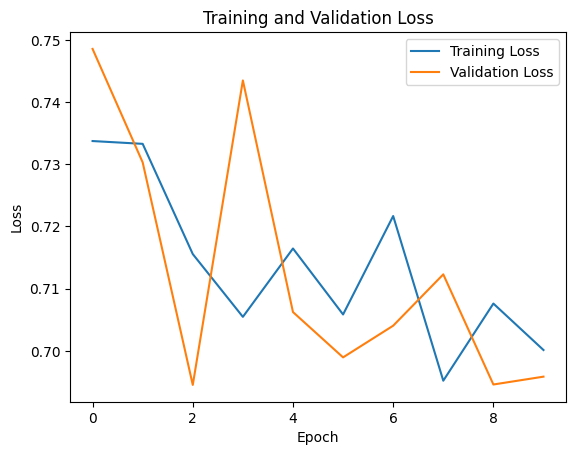

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history1.history['loss']
validation_loss = history1.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

# Step 5: Add New Classification Layers
model = Sequential([
    base_model,  # Add the ResNet50 base model
    GlobalAveragePooling2D(),  # Pooling layer
    Dense(256, activation='relu'),  # Custom Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 175s 3s/step - loss: 0.7332 - accuracy: 0.4981 - val_loss: 0.6963 - val_accuracy: 0.4975
Epoch 2/10
50/50 [==============================] - 150s 3s/step - loss: 0.7036 - accuracy: 0.5113 - val_loss: 0.6980 - val_accuracy: 0.5025
Epoch 3/10
50/50 [==============================] - 170s 3s/step - loss: 0.7077 - accuracy: 0.4988 - val_loss: 0.6963 - val_accuracy: 0.4975
Epoch 4/10
50/50 [==============================] - 154s 3s/step - loss: 0.7012 - accuracy: 0.4981 - val_loss: 0.6989 - val_accuracy: 0.5025
Epoch 5/10
50/50 [==============================] - 164s 3s/step - loss: 0.7014 - accuracy: 0.5056 - val_loss: 0.6953 - val_accuracy: 0.4975
Epoch 6/10
50/50 [==============================] - 167s 3s/step - loss: 0.7002 - accuracy: 0.4863 - val_loss: 0.6936 - val_accuracy: 0.4975
Epoch 7/10
50/50 [==============================] - 169s 3s/step - loss: 0.6994 - accuracy: 0.4825 - val_loss: 0.7063 - val_accuracy: 0.4975
Epoch 8/10
50

In [ ]:
base_model.summary()

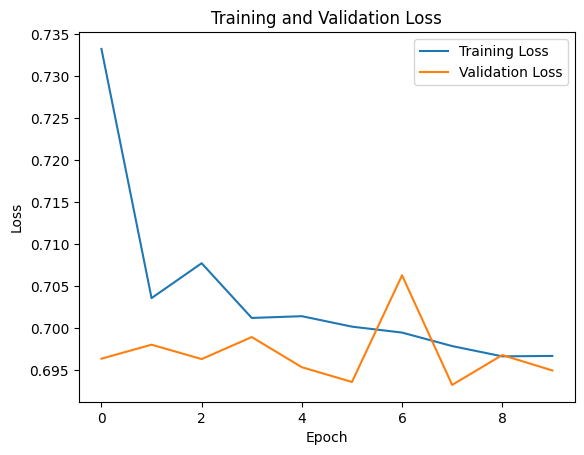

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Fine Tuning TL

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split

# Define your preprocessed data
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Step 4: Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
base_model.trainable = False

# Step 5: Add New Classification Layers
model = Sequential([
    base_model,  # Add the ResNet50 base model
    GlobalAveragePooling2D(),  # Pooling layer
    Dense(256, activation='relu'),  # Custom Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Fine-Tune the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 375s 7s/step - loss: 0.7310 - accuracy: 0.4931 - val_loss: 0.6923 - val_accuracy: 0.4950
Epoch 2/10
50/50 [==============================] - 352s 7s/step - loss: 0.7304 - accuracy: 0.5000 - val_loss: 0.6884 - val_accuracy: 0.5025
Epoch 3/10
50/50 [==============================] - 368s 7s/step - loss: 0.6973 - accuracy: 0.5325 - val_loss: 0.7055 - val_accuracy: 0.5025
Epoch 4/10
50/50 [==============================] - 353s 7s/step - loss: 0.7087 - accuracy: 0.5369 - val_loss: 0.6908 - val_accuracy: 0.4950
Epoch 5/10
50/50 [==============================] - 365s 7s/step - loss: 0.6916 - accuracy: 0.5412 - val_loss: 0.6976 - val_accuracy: 0.5300
Epoch 6/10
50/50 [==============================] - 362s 7s/step - loss: 0.6943 - accuracy: 0.5312 - val_loss: 0.7117 - val_accuracy: 0.5150
Epoch 7/10
50/50 [==============================] - 388s 8s/step - loss: 0.6905 - accuracy: 0.5562 - val_loss: 0.6808 - val_accuracy: 0.5525
Epoch 8/10
50

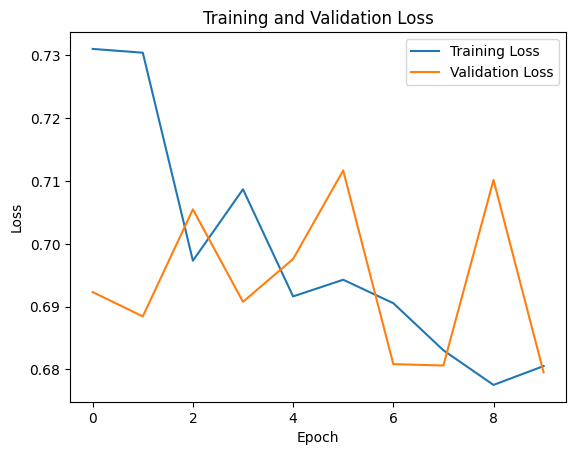

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 77s 5s/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.56      0.48      0.52       201
Not Effusion       0.54      0.62      0.58       199

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Freeze less of the model

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split

# Define your preprocessed data
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, shuffle=True)

# Step 4: Load Pretrained ResNet50 Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the number of layers to freeze
num_layers_to_freeze = 150  # Example: freeze the first 100 layers

# Freeze the first num_layers_to_freeze layers
for layer in base_model.layers[:num_layers_to_freeze]:
    layer.trainable = False

# Step 5: Add New Classification Layers
model = Sequential([
    base_model,  # Add the ResNet50 base model
    GlobalAveragePooling2D(),  # Pooling layer
    Dense(256, activation='relu'),  # Custom Dense layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Fine-Tune the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
50/50 [==============================] - 493s 10s/step - loss: 0.7768 - accuracy: 0.4975 - val_loss: 1.5966 - val_accuracy: 0.4975
Epoch 2/10
50/50 [==============================] - 492s 10s/step - loss: 0.6479 - accuracy: 0.6231 - val_loss: 19.3701 - val_accuracy: 0.4975
Epoch 3/10
50/50 [==============================] - 479s 10s/step - loss: 0.6206 - accuracy: 0.6625 - val_loss: 14.3103 - val_accuracy: 0.4975
Epoch 4/10
50/50 [==============================] - 472s 9s/step - loss: 0.6176 - accuracy: 0.6706 - val_loss: 9.4829 - val_accuracy: 0.4975
Epoch 5/10
50/50 [==============================] - 473s 10s/step - loss: 0.6006 - accuracy: 0.6662 - val_loss: 8.8357 - val_accuracy: 0.4975
Epoch 6/10
50/50 [==============================] - 478s 10s/step - loss: 0.6174 - accuracy: 0.6669 - val_loss: 26.3336 - val_accuracy: 0.4975
Epoch 7/10
50/50 [==============================] - 485s 10s/step - loss: 0.5791 - accuracy: 0.6875 - val_loss: 3.4752 - val_accuracy: 0.4975
Epoc

In [ ]:
base_model.summary()


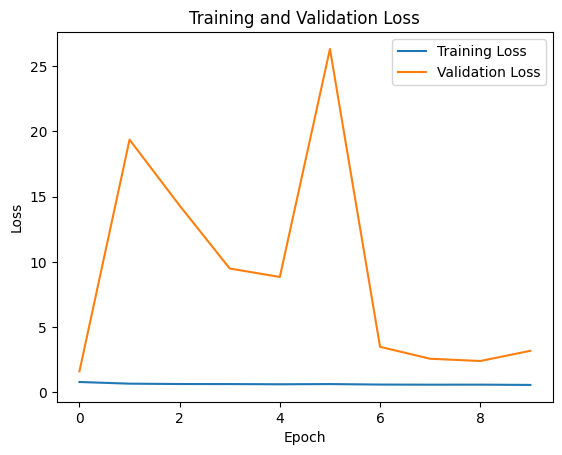

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 82s 6s/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.50      1.00      0.67       201
Not Effusion       0.50      0.01      0.01       199

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.34       400
weighted avg       0.50      0.50      0.34       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the CNN model with dropout regularization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Define the optimizer and compile the model
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for reducing learning rate, early stopping, and model checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model with the callbacks
history5 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')

Epoch 1/10
50/50 [==============================] - 181s 4s/step - loss: 0.7005 - accuracy: 0.5088 - val_loss: 0.6876 - val_accuracy: 0.6625 - lr: 2.5000e-04
Epoch 2/10
50/50 [==============================] - 179s 4s/step - loss: 0.6823 - accuracy: 0.5681 - val_loss: 0.6556 - val_accuracy: 0.6375 - lr: 2.5000e-04
Epoch 3/10
50/50 [==============================] - 177s 4s/step - loss: 0.6576 - accuracy: 0.6062 - val_loss: 0.6236 - val_accuracy: 0.6625 - lr: 2.5000e-04
Epoch 4/10
50/50 [==============================] - 181s 4s/step - loss: 0.6365 - accuracy: 0.6375 - val_loss: 0.6184 - val_accuracy: 0.6700 - lr: 2.5000e-04
Epoch 5/10
50/50 [==============================] - 178s 4s/step - loss: 0.6161 - accuracy: 0.6650 - val_loss: 0.6085 - val_accuracy: 0.6750 - lr: 2.5000e-04
Epoch 6/10
50/50 [==============================] - 187s 4s/step - loss: 0.6187 - accuracy: 0.6494 - val_loss: 0.6334 - val_accuracy: 0.6350 - lr: 2.5000e-04
Epoch 7/10
50/50 [==============================] - 

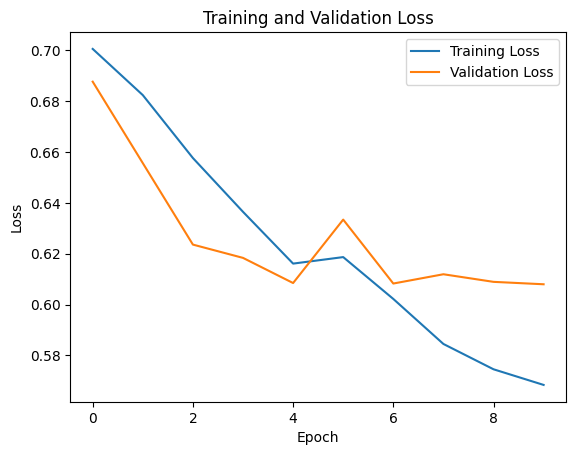

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history5.history['loss']
validation_loss = history5.history['val_loss']

# Plot training and validation loss
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for validation set
y_pred_prob = model.predict(X_val)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Decode encoded labels back to original labels
decoded_labels = label_encoder.inverse_transform(y_val)
decoded_predictions = label_encoder.inverse_transform(y_pred)

# Generate classification report
report = classification_report(decoded_labels, decoded_predictions)
print("Classification Report:")
print(report)

13/13 [==============================] - 13s 973ms/step
Classification Report:
              precision    recall  f1-score   support

    Effusion       0.66      0.70      0.68       201
Not Effusion       0.68      0.64      0.66       199

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
